In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
df=pd.read_csv("/content/drive/Othercomputers/My Laptop/AI_ML/Loan_data.csv")

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# EDA


In [4]:
df.shape

(9578, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [8]:
df[["not.fully.paid"]].value_counts(normalize=True)

not.fully.paid
0                 0.839946
1                 0.160054
dtype: float64

In [9]:
df.purpose.nunique()

7

In [10]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [11]:
df.groupby('purpose')['not.fully.paid'].value_counts()

purpose             not.fully.paid
all_other           0                 1944
                    1                  387
credit_card         0                 1116
                    1                  146
debt_consolidation  0                 3354
                    1                  603
educational         0                  274
                    1                   69
home_improvement    0                  522
                    1                  107
major_purchase      0                  388
                    1                   49
small_business      0                  447
                    1                  172
Name: not.fully.paid, dtype: int64

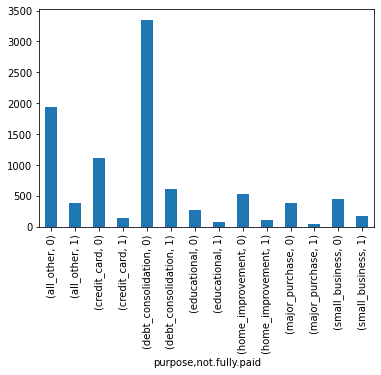

In [12]:
df.groupby('purpose')['not.fully.paid'].value_counts().plot(kind='bar')

In [13]:
df_obj = df.select_dtypes(include=["object"])

In [14]:
df_obj.head()

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card


In [15]:
df_obj.nunique()

purpose    7
dtype: int64

In [16]:
df_obj.shape

(9578, 1)

In [17]:
# Feature Transformation

# Feature Transformation

In [18]:

## labeleencoading

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df_obj  = label.fit_transform(df_obj)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
df_obj = pd.DataFrame(df_obj,columns=["Purpose"])

In [20]:
df_obj.head()

,Purpose
0,2
1,1
2,2
3,2
4,1


In [21]:
df = pd.concat([df_obj,df],axis=1)

In [22]:
df.head()

,Purpose,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,2,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,2,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [23]:
df.drop('purpose', axis=1, inplace=True)

In [24]:
df.columns

Index(['Purpose', 'credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [25]:
df.shape

(9578, 14)

In [26]:
df.head()

,Purpose,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,2,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,2,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [27]:
df.corr()

,Purpose,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
Purpose,1.000000,0.017569,0.117067,0.154827,0.088958,-0.053279,0.057337,0.047526,0.042364,-0.062947,0.037516,-0.011701,0.004793,0.047907
credit.policy,0.017569,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,0.117067,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.154827,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.088958,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.053279,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.057337,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.047526,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,0.042364,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.062947,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088


In [28]:
df.columns

Index(['Purpose', 'credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [29]:
 
X=df.iloc[:,0:13].values

y=df.iloc[:,[13]].values


In [30]:
X

array([[2.    , 1.    , 0.1189, ..., 0.    , 0.    , 0.    ],
       [1.    , 1.    , 0.1071, ..., 0.    , 0.    , 0.    ],
       [2.    , 1.    , 0.1357, ..., 1.    , 0.    , 0.    ],
       ...,
       [2.    , 0.    , 0.1071, ..., 8.    , 0.    , 0.    ],
       [4.    , 0.    , 0.16  , ..., 5.    , 0.    , 0.    ],
       [2.    , 0.    , 0.1392, ..., 6.    , 0.    , 0.    ]])

In [31]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [32]:
print(X.shape)
print(y.shape)

(9578, 13)
(9578, 1)


# StandardScaler

In [33]:
# scale for X 
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_scaled = std_scale.fit_transform(X)

In [34]:
X_scaled

array([[ 0.03317632,  0.49222226, -0.13931753, ..., -0.71698894,
        -0.29973008, -0.23700318],
       [-0.55966463,  0.49222226, -0.57886837, ..., -0.71698894,
        -0.29973008, -0.23700318],
       [ 0.03317632,  0.49222226,  0.48648368, ..., -0.26247044,
        -0.29973008, -0.23700318],
       ...,
       [ 0.03317632, -2.03160257, -0.57886837, ...,  2.91915909,
        -0.29973008, -0.23700318],
       [ 1.2188582 , -2.03160257,  1.39166043, ...,  1.55560358,
        -0.29973008, -0.23700318],
       [ 0.03317632, -2.03160257,  0.61685894, ...,  2.01012208,
        -0.29973008, -0.23700318]])

In [35]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test =train_test_split(X_scaled ,y ,train_size= 0.8, random_state=100)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(7662, 13)
(7662, 1)
(1916, 13)
(1916, 1)


# SMOTE for data imbalance

In [37]:

from imblearn.over_sampling import SMOTE

SS = SMOTE(sampling_strategy="minority",random_state=100)
X_train_res, y_train_res =SS.fit_resample(X_train,y_train)


In [38]:
print(X_train_res.shape)
print(y_train_res.shape)

(12916, 13)
(12916,)


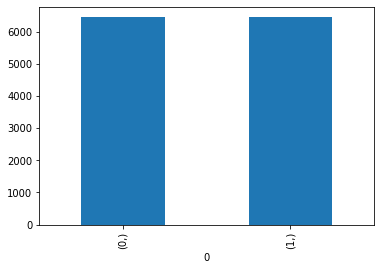

In [39]:
# after smote
(pd.DataFrame(y_train_res)).value_counts().plot(kind='bar')

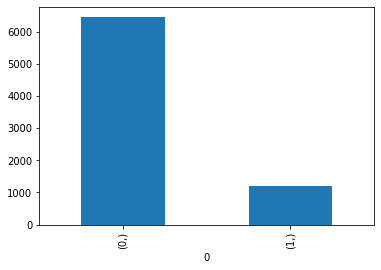

In [40]:
# before smote
(pd.DataFrame(y_train)).value_counts().plot(kind='bar')

# ANN

In [41]:
# model architecture
callback = tf.keras.callbacks.EarlyStopping(monitor='val_recall',patience=10)
checkpoint_filepath = '/tmp/check_point_file_loan_project_200'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_recall',
    mode='max',
    save_best_only=True)


model= tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=10,activation="relu",input_shape=(X_train_res.shape[1],))),
model.add(tf.keras.layers.Dense(units=8,activation="relu")),
model.add(tf.keras.layers.Dense(units=2,activation="relu")),
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))


In [42]:
# model_compile
model.compile(optimizer="Adam",
              loss="binary_crossentropy"
              ,metrics=["Recall"])

In [43]:
X_train_res.shape[1]

13

In [44]:
# model.fit

model_history= model.fit(X_train_res,
          y_train_res,
          epochs=200,
          validation_data=(X_test,y_test),
          callbacks=[callback,model_checkpoint_callback])

Epoch 1/200
404/404 [==============================] - 2s 3ms/step - loss: 0.6655 - recall: 0.6857 - val_loss: 0.6424 - val_recall: 0.6109
Epoch 2/200
404/404 [==============================] - 1s 2ms/step - loss: 0.6472 - recall: 0.6513 - val_loss: 0.6570 - val_recall: 0.7356
Epoch 3/200
404/404 [==============================] - 1s 4ms/step - loss: 0.6404 - recall: 0.7075 - val_loss: 0.6571 - val_recall: 0.7386
Epoch 4/200
404/404 [==============================] - 1s 4ms/step - loss: 0.6362 - recall: 0.7228 - val_loss: 0.6457 - val_recall: 0.7021
Epoch 5/200
404/404 [==============================] - 2s 4ms/step - loss: 0.6329 - recall: 0.7222 - val_loss: 0.6471 - val_recall: 0.7082
Epoch 6/200
404/404 [==============================] - 2s 4ms/step - loss: 0.6302 - recall: 0.7439 - val_loss: 0.6485 - val_recall: 0.7082
Epoch 7/200
404/404 [==============================] - 2s 4ms/step - loss: 0.6287 - recall: 0.7191 - val_loss: 0.6487 - val_recall: 0.6991
Epoch 8/200
404/404 [======

In [45]:
model_history.history.keys()

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])

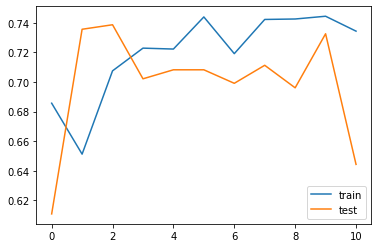

In [46]:
plt.plot(model_history.history['recall'])
plt.plot(model_history.history['val_recall'])
plt.legend(["train","test"])


In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [48]:
model.load_weights(checkpoint_filepath)

In [49]:
# train data result


pred_train =model.predict(X_train).round()
print("--------------- Prediction on Train data -------------------")
print(pred_train)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_train, pred_train))
print("--------------- Classification Report -------------------")
print(classification_report(y_train, pred_train))

--------------- Prediction on Train data -------------------
[[0.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
--------------- Confusion Matrix -------------------
[[3321 3137]
 [ 314  890]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.91      0.51      0.66      6458
           1       0.22      0.74      0.34      1204

    accuracy                           0.55      7662
   macro avg       0.57      0.63      0.50      7662
weighted avg       0.80      0.55      0.61      7662



In [50]:
# test data result(classification)


pred_test = model.predict(X_test).round()
print("--------------- Prediction on Test data -------------------")
print(pred_test)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_test, pred_test))
print("--------------- Classification Report -------------------")
print(classification_report(y_test, pred_test))

--------------- Prediction on Test data -------------------
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]
--------------- Confusion Matrix -------------------
[[813 774]
 [ 86 243]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.90      0.51      0.65      1587
           1       0.24      0.74      0.36       329

    accuracy                           0.55      1916
   macro avg       0.57      0.63      0.51      1916
weighted avg       0.79      0.55      0.60      1916



# Logreg

In [51]:
from sklearn.linear_model import LogisticRegression


In [52]:
logreg=LogisticRegression()
logreg.fit(X_train_res,y_train_res)

LogisticRegression()

In [53]:
# test data


pred_test = logreg.predict(X_test)
print("--------------- Prediction on Test data -------------------")
print(pred_test)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_test, pred_test))
print("--------------- Classification Report -------------------")
print(classification_report(y_test, pred_test))

--------------- Prediction on Test data -------------------
[0 0 1 ... 0 0 1]
--------------- Confusion Matrix -------------------
[[964 623]
 [118 211]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.89      0.61      0.72      1587
           1       0.25      0.64      0.36       329

    accuracy                           0.61      1916
   macro avg       0.57      0.62      0.54      1916
weighted avg       0.78      0.61      0.66      1916



# DT

In [54]:
from sklearn.tree import DecisionTreeClassifier
DT_MODEL=DecisionTreeClassifier()
DT_MODEL.fit(X_train_res,y_train_res)

DecisionTreeClassifier()

In [55]:
# test data


pred_test = DT_MODEL.predict(X_test)
print("--------------- Prediction on Test data -------------------")
print(pred_test)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_test, pred_test))
print("--------------- Classification Report -------------------")
print(classification_report(y_test, pred_test))

--------------- Prediction on Test data -------------------
[0 0 0 ... 0 0 0]
--------------- Confusion Matrix -------------------
[[1259  328]
 [ 234   95]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1587
           1       0.22      0.29      0.25       329

    accuracy                           0.71      1916
   macro avg       0.53      0.54      0.54      1916
weighted avg       0.74      0.71      0.72      1916



# random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [57]:
# test data


pred_test = rf.predict(X_test)
print("--------------- Prediction on Test data -------------------")
print(pred_test)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_test, pred_test))
print("--------------- Classification Report -------------------")
print(classification_report(y_test, pred_test))

--------------- Prediction on Test data -------------------
[0 0 0 ... 0 0 0]
--------------- Confusion Matrix -------------------
[[1489   98]
 [ 284   45]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1587
           1       0.31      0.14      0.19       329

    accuracy                           0.80      1916
   macro avg       0.58      0.54      0.54      1916
weighted avg       0.75      0.80      0.77      1916



# XGB

In [58]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train_res,y_train_res)

XGBClassifier()

In [59]:
# test data


pred_test = XGB.predict(X_test)
print("--------------- Prediction on Test data -------------------")
print(pred_test)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_test, pred_test))
print("--------------- Classification Report -------------------")
print(classification_report(y_test, pred_test))

--------------- Prediction on Test data -------------------
[0 0 0 ... 0 0 0]
--------------- Confusion Matrix -------------------
[[1431  156]
 [ 252   77]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1587
           1       0.33      0.23      0.27       329

    accuracy                           0.79      1916
   macro avg       0.59      0.57      0.57      1916
weighted avg       0.76      0.79      0.77      1916



# adaboost

In [60]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()
adaboost.fit(X_train_res,y_train_res)

AdaBoostClassifier()

In [61]:
# test data


pred_test = adaboost.predict(X_test)
print("--------------- Prediction on Test data -------------------")
print(pred_test)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_test, pred_test))
print("--------------- Classification Report -------------------")
print(classification_report(y_test, pred_test))

--------------- Prediction on Test data -------------------
[0 1 0 ... 0 1 1]
--------------- Confusion Matrix -------------------
[[1274  313]
 [ 196  133]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1587
           1       0.30      0.40      0.34       329

    accuracy                           0.73      1916
   macro avg       0.58      0.60      0.59      1916
weighted avg       0.77      0.73      0.75      1916

